In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(12, 10)})
#sns.set(font_scale = 2)

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Insert dataframes

In [3]:
cwd = os.getcwd()

In [4]:
crypto_norm = pd.read_pickle(cwd + '/data/crypto_norm.pkl')
crypto_daily = pd.read_pickle(cwd + '/data/crypto_daily.pkl')
crypto_weekly = pd.read_pickle(cwd + '/data/crypto_weekly.pkl')
crypto_monthly = pd.read_pickle(cwd + '/data/monthly_count.pkl')
full_df_no_dupl = pd.read_pickle(cwd + '/data/full_df_no_duplicates.pkl')
grouped_df = pd.read_pickle(cwd + '/data/grouped_df.pkl')

### Cryptocurrencies

In [4]:
crypto_norm

,date,cryptocurrency_name,repo_name,is_forked,language,last_updated,commits_24h,commits_7d,changes_24h_loc_added,changes_24h_loc_removed,...,commits_1y,changes_1y_loc_added,changes_1y_loc_removed,stars,forks,watchers,symbol,market_cap_rank,price_usd,market_cap_usd
0,2018-01-21,0x,0x-codesandbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ZRX,38.0,2.04422,1.017565e+09
1,2018-01-21,0x,0x.js,False,TypeScript,3h,0.0,70.0,0.0,0.0,...,2721.0,157263.0,85176.0,300.0,58.0,62.0,ZRX,38.0,2.04422,1.017565e+09
2,2018-01-21,0x,0x.js-starter-project,False,TypeScript,2d,0.0,0.0,0.0,0.0,...,6.0,4463.0,56.0,3.0,0.0,4.0,ZRX,38.0,2.04422,1.017565e+09
3,2018-01-21,0x,0x-launch-kit-frontend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ZRX,38.0,2.04422,1.017565e+09
4,2018-01-21,0x,0x-launch-kit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ZRX,38.0,2.04422,1.017565e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013775,2019-02-04,ZenCash,zensystem.io-botio-docker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3013776,2019-02-04,ZenCash,zen-tipbot-docker,False,Shell,362d,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,NaN,NaN,NaN,NaN
3013777,2019-02-04,ZenCash,zen-tipbot,False,JavaScript,287d,0.0,0.0,0.0,0.0,...,152.0,0.0,0.0,3.0,6.0,11.0,NaN,NaN,NaN,NaN
3013778,2019-02-04,ZenCash,znodes,True,Python,117d,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN


Focus on Weekly data

Analyse and investigate both univariate and multivariate timeseries.

In [5]:
crypto_weekly

,date,cryptocurrency_name,repo_name,commits_7d,changes_7d_loc_added,changes_7d_loc_removed,forks,watchers
1,2018-01-21,0x,0x.js,70.0,1416.0,513.0,58.0,62.0
2,2018-01-21,0x,0x.js-starter-project,0.0,0.0,0.0,0.0,4.0
10,2018-01-21,0x,bignumber.js,0.0,0.0,0.0,0.0,4.0
11,2018-01-21,0x,branding,0.0,0.0,0.0,0.0,5.0
12,2018-01-21,0x,chai-bignumber,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...
3013774,2019-02-04,ZenCash,zen-seeder,0.0,0.0,0.0,0.0,6.0
3013776,2019-02-04,ZenCash,zen-tipbot-docker,0.0,0.0,0.0,0.0,9.0
3013777,2019-02-04,ZenCash,zen-tipbot,0.0,0.0,0.0,6.0,11.0
3013778,2019-02-04,ZenCash,znodes,0.0,0.0,0.0,1.0,2.0


In [6]:
crypto_weekly.groupby('date').sum()[['commits_7d','changes_7d_loc_added','changes_7d_loc_removed']]
#there is a difference in the magnitudes of the numbers

,commits_7d,changes_7d_loc_added,changes_7d_loc_removed
date,,,
2018-01-21,4742.0,2166469.0,875858.0
2018-01-22,5312.0,3285042.0,2273592.0
2018-01-23,5409.0,3230168.0,2311795.0
2018-01-24,5700.0,4479924.0,2495540.0
2018-01-25,5884.0,4170486.0,2443281.0
...,...,...,...
2019-01-31,7338.0,9966623.0,4414469.0
2019-02-01,7353.0,7057969.0,4357118.0
2019-02-02,7277.0,5786647.0,4441513.0


In [7]:
weekly_grouped = crypto_weekly.groupby('date').sum()[['commits_7d','changes_7d_loc_added','changes_7d_loc_removed']]

### Analysis

#### Explore the time series individually

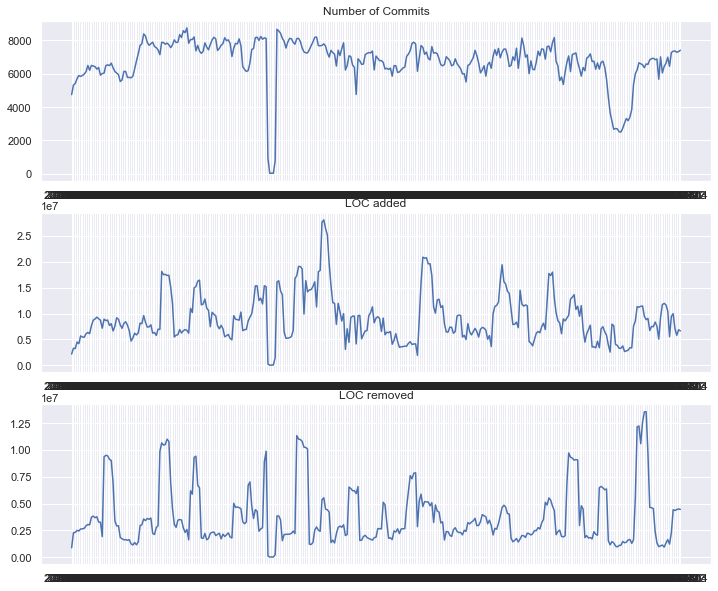

In [45]:
fig, ax = plt.subplots(3)
ax[0].set_title("Number of Commits")
ax[0].plot(weekly_grouped['commits_7d'])
ax[1].set_title("LOC added")
ax[1].plot(weekly_grouped['changes_7d_loc_added'], label = "LOC added")
ax[2].set_title("LOC removed")
ax[2].plot(weekly_grouped['changes_7d_loc_removed'], label = "LOC removed")
plt.savefig("Univariate_timeseries.png")

Initial notes:
- Number of Commits:
    - No trend
    - No seasonality or cyclicity
    - Two huge drops (inspect)
- LOC added:
    - No trend
    - No seasonality or cyclicity
- LOC removed:
    - No trend
    - No seasonality or cyclicity

Extra point!
In the two huge drops of the number of commits the LOC changed is not affected drastically.

Autocorrelations

In [48]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

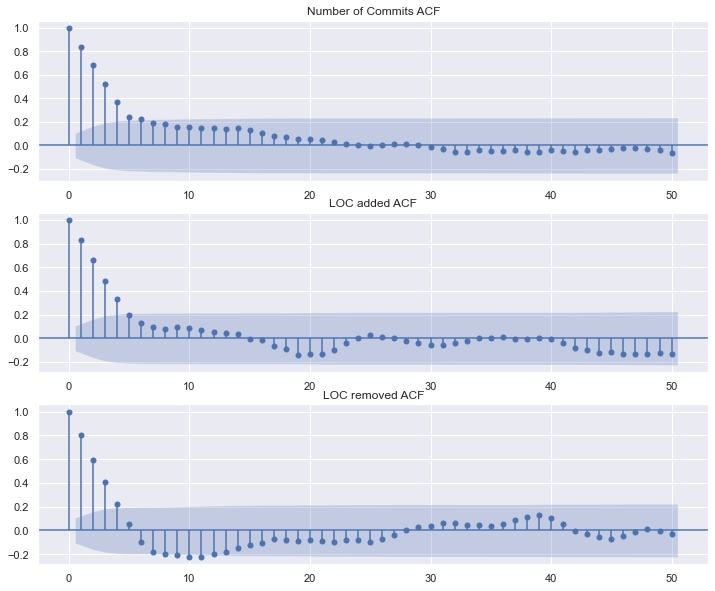

In [47]:
fig, ax = plt.subplots(3)
plot_acf(weekly_grouped['commits_7d'].values.squeeze(), lags=50, title = "Number of Commits ACF", ax=ax[0])
plot_acf(weekly_grouped['changes_7d_loc_added'].values.squeeze(), lags=50, title = "LOC added ACF", ax=ax[1])
plot_acf(weekly_grouped['changes_7d_loc_removed'].values.squeeze(), lags=50, title = "LOC removed ACF", ax=ax[2])
# plt.show()
#plt.savefig("ACF_plots.png")

ACF notes:
- No signs of trend and seasonality in the data as it was observed earlier.
- The data are not white noise.
- The first 6-7 lags are significant for #of Commits and LOC added and the first 5 for the LOC removed.

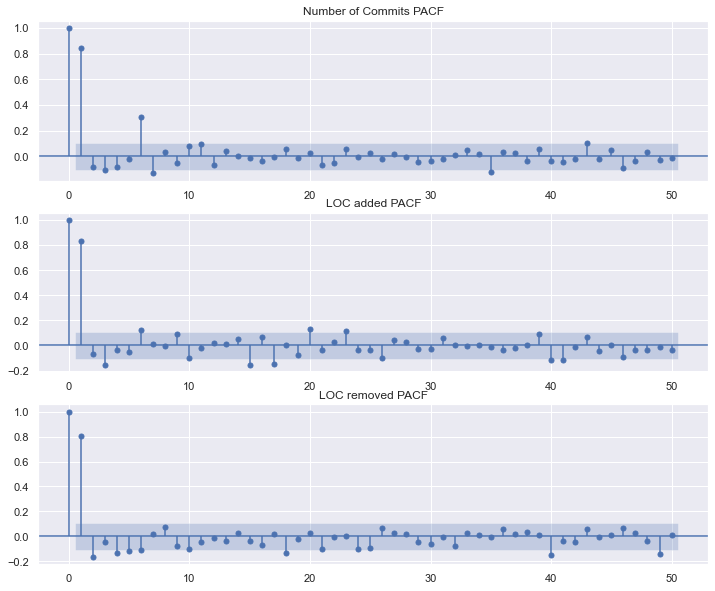

In [82]:
fig, ax = plt.subplots(3)
plot_pacf(weekly_grouped['commits_7d'].values.squeeze(), lags=50, title = "Number of Commits PACF", ax=ax[0])
plot_pacf(weekly_grouped['changes_7d_loc_added'].values.squeeze(), lags=50, title = "LOC added PACF", ax=ax[1])
plot_pacf(weekly_grouped['changes_7d_loc_removed'].values.squeeze(), lags=50, title = "LOC removed PACF", ax=ax[2])
plt.show()
#plt.savefig("ACF_plots.png")

PACF notes:
- The first **2** and the **7** lag have a direct impact on the current value of the number of commits.
- The first **2** for the LOC added.
- The first **2** for the LOC removed.

#### Decomposition

- Additive or Multiplicative decomposition?

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

We can say that Trend and Seasonality (if there are any) are constant over time, so we will start with Additive.

STL

In [137]:
stl = STL(weekly_grouped['commits_7d'], period = 52)
result_stl = stl.fit()
seasonal, trend, resid = result_stl.seasonal, result_stl.trend, result_stl.resid

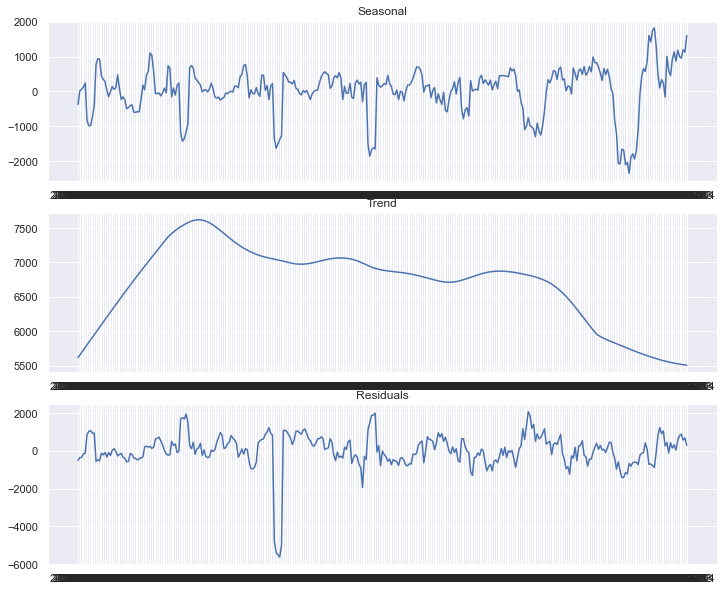

In [138]:
plt.subplot(3,1,1)
plt.plot(seasonal)
plt.title('Seasonal')

plt.subplot(3,1,2)
plt.plot(trend)
plt.title('Trend')

plt.subplot(3,1,3)
plt.plot(resid)
plt.title('Residuals')

plt.show()

Classical

In [139]:
result=seasonal_decompose(weekly_grouped['commits_7d'], model='additive', period = 52)
seasonal_c, trend_c, resid_c = result.seasonal, result.trend, result.resid

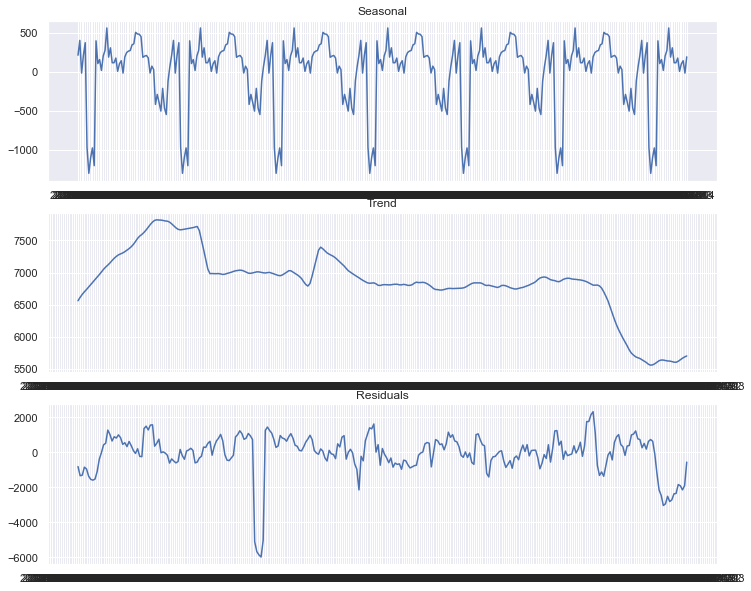

In [140]:
plt.subplot(3,1,1)
plt.plot(seasonal_c)
plt.title('Seasonal')

plt.subplot(3,1,2)
plt.plot(trend_c)
plt.title('Trend')

plt.subplot(3,1,3)
plt.plot(resid_c)
plt.title('Residuals')

plt.show()

Decomposition notes:
- No apparent trend
- Sings of seasonality (approximately two-month period for number of commits)
- The residuals look a lot like the original time series so trend and seasonality cannot explain the data and there is more information in them.

(The decomposition above is only for the number of commits, it can be very easily visuallised for the other features too.)

#### Stationarity

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    print(column,":",test_result)

In [10]:
test_stationarity(weekly_grouped, 'commits_7d')
test_stationarity(weekly_grouped, 'changes_7d_loc_added')
test_stationarity(weekly_grouped, 'changes_7d_loc_removed')

commits_7d : Stationary
changes_7d_loc_added : Stationary
changes_7d_loc_removed : Stationary


#### Explore the relations between the columns

Correlations

In [27]:
def print_correlation(x,y):
    corr = x.corr(y)
    print("Correlation of {x} - {y}: {c}".format(x=x.name, y=y.name,c=corr))

In [145]:
print_correlation(weekly_grouped['commits_7d'],weekly_grouped['changes_7d_loc_added'])
print_correlation(weekly_grouped['commits_7d'],weekly_grouped['changes_7d_loc_removed'])
print("-------------------------")
print_correlation(weekly_grouped['changes_7d_loc_added'],weekly_grouped['changes_7d_loc_removed'])

Correlation of commits_7d - changes_7d_loc_added: 0.49151724740864045
Correlation of commits_7d - changes_7d_loc_removed: 0.28182318884615293
-------------------------
Correlation of changes_7d_loc_added - changes_7d_loc_removed: 0.40468960135030174


Visualisation of the relationships

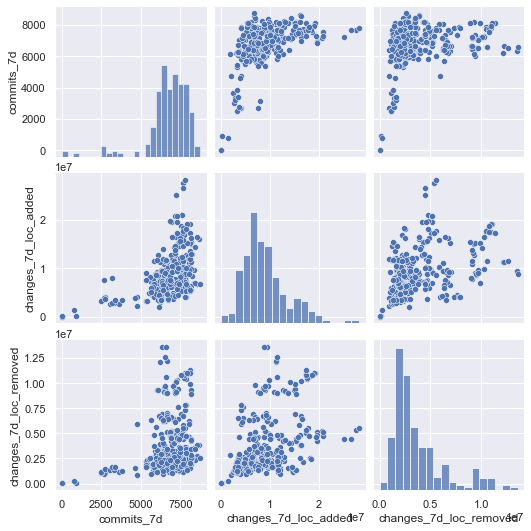

In [231]:
sns.pairplot(weekly_grouped)
plt.savefig("pairplots.png")

Inspect the distributions of the features

In [11]:
import scipy.stats as st

In [34]:
def get_best_distribution(data):
#     dist_names = ['bernoulli','betabinom','binom','boltzmann','dlaplace','geom','hypergeom','logser',
#                 'nbinom','nchypergeom_fisher','nchypergeom_wallenius','nhypergeom','planck','poisson',
#                 'randint','skellam','yulesimon','zipf','zipfian']
    dist_names = ['alpha','beta','chi','chi2','dgamma','dweibull','erlang','expon',
            'exponnorm','exponweib','f','gennorm','genexpon',
            'genextreme','gausshyper','gamma','gengamma','invgamma','invgauss',
            'invweibull','johnsonsb','johnsonsu','laplace','laplace_asymmetric','logistic','loggamma',
            'loglaplace','lognorm','loguniform','maxwell','nakagami','ncf','nct','norm','powernorm','rdist',
            't','uniform','weibull_min','weibull_max']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        #print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print(data.name)
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    #return best_dist, best_p, params[best_dist]

In [35]:
get_best_distribution(weekly_grouped['commits_7d'])
get_best_distribution(weekly_grouped['changes_7d_loc_added'])
get_best_distribution(weekly_grouped['changes_7d_loc_removed'])

commits_7d
Best fitting distribution: johnsonsu
Best p value: 0.10706032458068493
Parameters for the best fit: (2.018962591457397, 1.6357127859076264, 8349.234103642604, 842.7970003316569)
changes_7d_loc_added
Best fitting distribution: laplace_asymmetric
Best p value: 0.9250433889859178
Parameters for the best fit: (0.6269044959520937, 6279047.999999803, 2870924.947171221)
changes_7d_loc_removed
Best fitting distribution: johnsonsu
Best p value: 0.6117728127267443
Parameters for the best fit: (-1.4943305044941435, 1.0049599192301413, 1286677.2262256928, 756597.1240777203)


Curve fitting (polynomial)

In [19]:
def poly_params(x,y,d):
    poly = np.polyfit(x, y, d)
    print("Polynomial parameters:",poly)
    return poly

Polynomial parameters: [-5.43640628e-06  2.34451471e-01 -2.05359430e+02  1.20275175e+06]


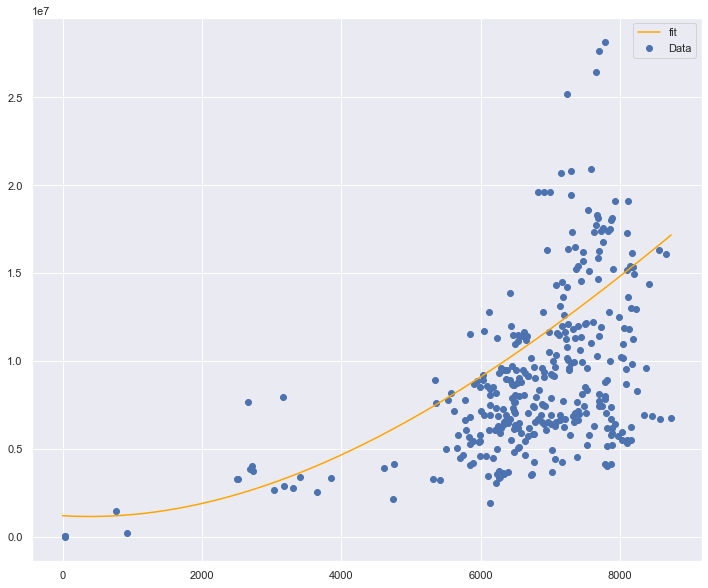

In [63]:
poly = poly_params(weekly_grouped['commits_7d'], weekly_grouped['changes_7d_loc_added'], 3)
fig, ax = plt.subplots()
ax.scatter(weekly_grouped['commits_7d'],weekly_grouped['changes_7d_loc_added'], label = "Data")
ax.plot(np.polyval(poly,np.linspace(0,10000,int(weekly_grouped['commits_7d'].max()))),color="orange", label = "fit")
ax.legend()
plt.savefig("com_add_poly.png")

Polynomial parameters: [-2.58610968e-05  3.47059569e-01 -6.35699680e+02  3.94887219e+05]


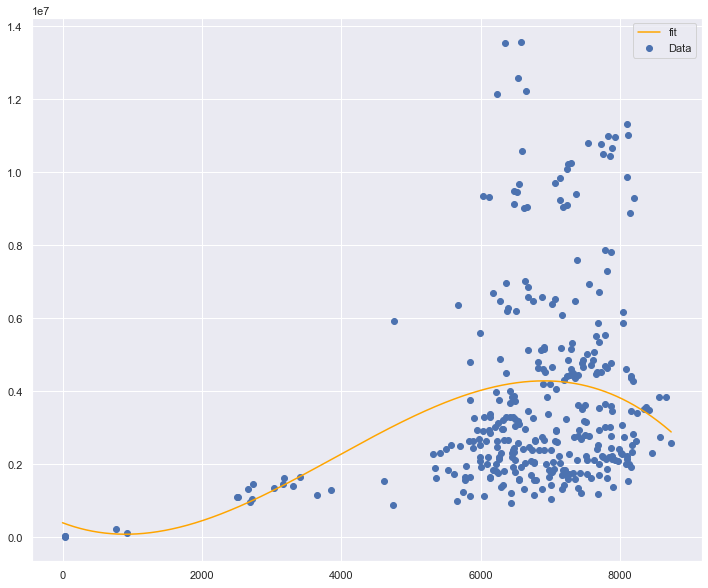

In [233]:
poly = poly_params(weekly_grouped['commits_7d'], weekly_grouped['changes_7d_loc_removed'], 3)
fig, ax = plt.subplots()
ax.scatter(weekly_grouped['commits_7d'],weekly_grouped['changes_7d_loc_removed'], label = "Data")
ax.plot(np.polyval(poly,np.linspace(0,10000,int(weekly_grouped['commits_7d'].max()))),color="orange", label = "fit")
ax.legend()
plt.savefig("com_rem_poly.png")

### Software Projects

In [5]:
full_df_no_dupl

,hash_id,date,lines_added,lines_deleted,project,Packages
0,000899acba05e5b9a2a630d59164ba055553e278,2017-06-24,1,1,log4j,[log4j-api-message]
1,0016185419e35dc903d0098689cb00326500f054,2021-12-26,25,1,jackson-databind,[deser]
2,001aaada7dab82c3c09cde5f8e14245dc9d8b454,2021-11-29,84,54,log4j,"[log4j-core-util, log4j-core-pattern]"
3,001bd2f7ae2997652bf3ac8e76a2a545fae9924f,2014-09-14,12,8,log4j,[log4j-core-util]
4,00255f2d013ad688c9fceade16fe478da572005d,2013-12-10,2,1,jackson-databind,[ser]
...,...,...,...,...,...,...
8739,ffca20367627ab5ee2d597d1194e0f33efbe303d,2015-09-11,3,3,log4j,[log4j-core-config]
8740,ffcdaadcccb3dfd61fae2661c5c72b842370f6ce,2019-07-29,17,4,jackson-databind,[type]
8741,ffd2e9a8f173a691bf329819cdc2a74751a5b15b,2015-11-02,3,1,log4j,[log4j-core-filter]
8742,ffedf33f170c8f0f8cc9bd943c2175ac73bf5d77,2016-04-20,124,1,log4j,[log4j-core-layout]


In [6]:
grouped_df

,commits_24h,changes_24h_lines_added,changes_24h_lines_removed,commits_7d,changes_7d_lines_added,changes_7d_lines_removed
date,,,,,,
2010-01-03,3,921,3,3,921,3
2010-01-09,4,16,14,7,937,17
2010-01-16,2,9,10,2,9,10
2010-01-21,1,9,9,3,18,19
2010-01-25,3,12,17,4,21,26
...,...,...,...,...,...,...
2022-04-19,4,26,43,7,1115,339
2022-04-20,7,252,30,13,755,123
2022-04-21,2,11,20,15,766,143


Firstly, we need to perform some inspection on the dataset

In [7]:
#Year range in the dataset
years = int((grouped_df.index.max() - grouped_df.index.min()).days / 365.2425)
print("Years in grouped_df:", years)
#We want to have the last 2 years
print("Last date of the dataset:",grouped_df.index.max())

Years in grouped_df: 12
Last date of the dataset: 2022-04-27


The focus of this research is going to be on the last 2 years of data.

In [8]:
grouped_df_short = grouped_df.loc[pd.to_datetime('2020-04-27'):]

In [9]:
grouped_df_short

,commits_24h,changes_24h_lines_added,changes_24h_lines_removed,commits_7d,changes_7d_lines_added,changes_7d_lines_removed
date,,,,,,
2020-04-27,1,1,1,3,20,1
2020-04-28,2,159,11,5,179,12
2020-04-30,1,144,0,6,323,12
2020-05-01,1,3,1,5,307,13
2020-05-02,2,56,31,7,363,44
...,...,...,...,...,...,...
2022-04-19,4,26,43,7,1115,339
2022-04-20,7,252,30,13,755,123
2022-04-21,2,11,20,15,766,143


### Analysis

#### Explore the time series individually

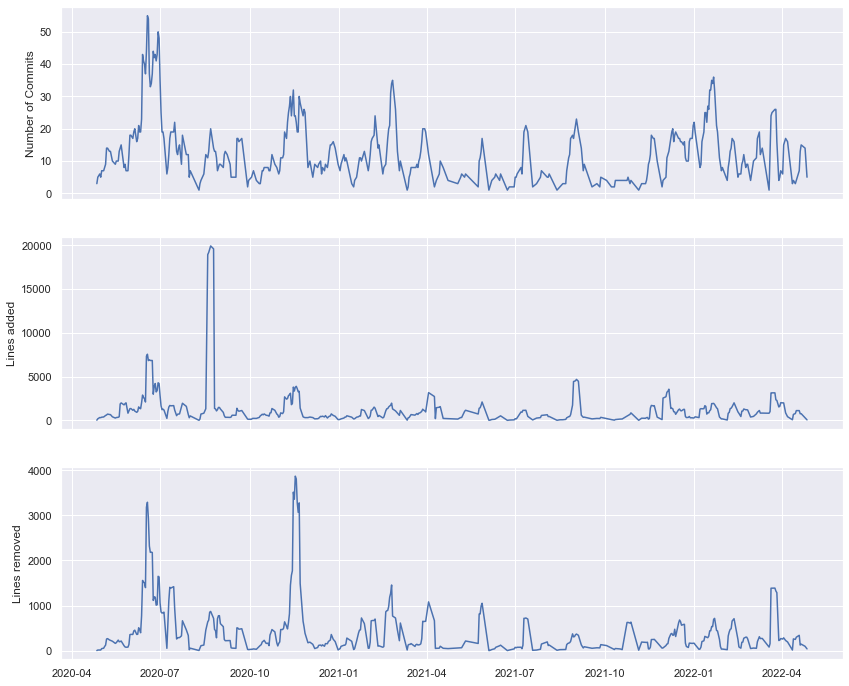

In [10]:
fig, ax = plt.subplots(3, figsize=(14,12), sharex=True)
ax[0].set_ylabel("Number of Commits")
ax[0].plot(grouped_df_short['commits_7d'])
ax[1].set_ylabel("Lines added")
ax[1].plot(grouped_df_short['changes_7d_lines_added'], label = "Lines added")
ax[2].set_ylabel("Lines removed")
ax[2].plot(grouped_df_short['changes_7d_lines_removed'], label = "Lines removed")
#plt.savefig("Multivariate_timeseries.png")

Initial notes:
- Number of Commits:
    - No trend
    - No seasonality or cyclicity
    - One (possibly two) big increases
- Lines added:
    - No trend
    - No seasonality or cyclicity
    - One huge peak (inspect)
- Lines removed:
    - No trend
    - No seasonality or cyclicity
    - Two huge peaks

**Extra point!**
Lines removed and commits seem to share a huge peak, while there is one huge peak from lines added and another one from lines removed.


From the visual inspection, there are at least 3 moments in the time series that **seem to behave anomalous**.

Autocorrelations

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

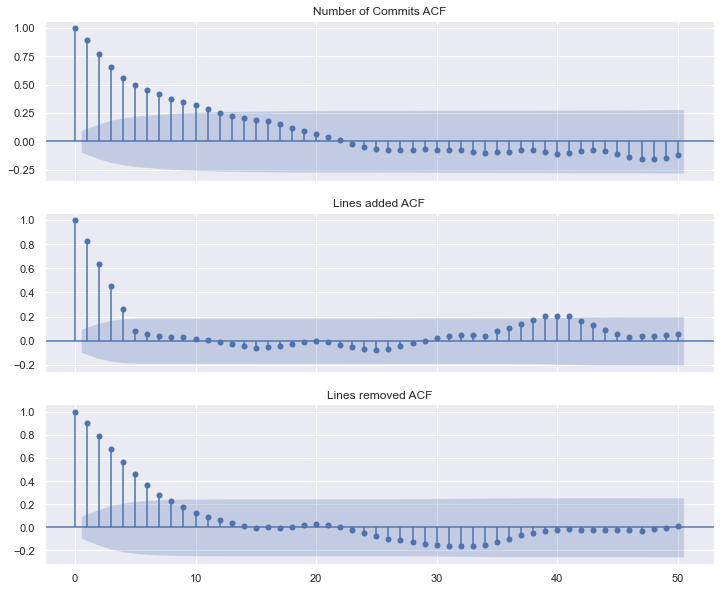

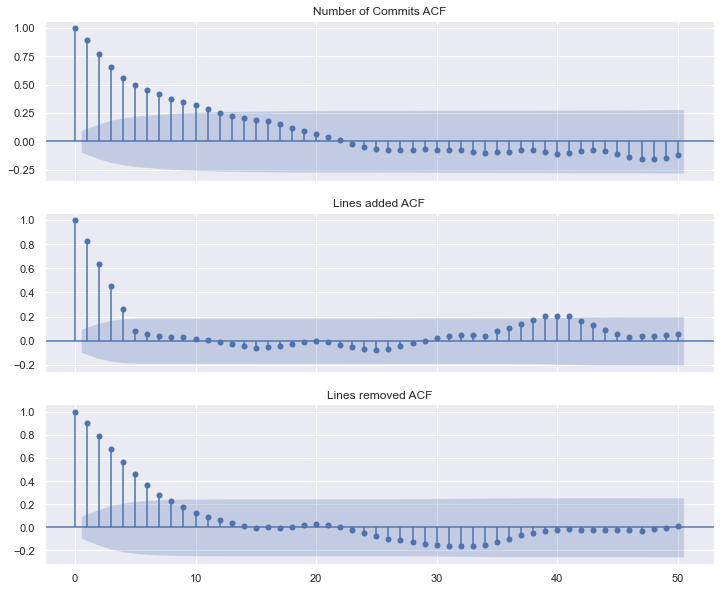

In [12]:
fig, ax = plt.subplots(3, sharex=True)
plot_acf(grouped_df_short['commits_7d'].values.squeeze(), lags=50, title = "Number of Commits ACF", ax=ax[0])
plot_acf(grouped_df_short['changes_7d_lines_added'].values.squeeze(), lags=50, title = "Lines added ACF", ax=ax[1])
plot_acf(grouped_df_short['changes_7d_lines_removed'].values.squeeze(), lags=50, title = "Lines removed ACF", ax=ax[2])
# plt.show()
#plt.savefig("ACF_plots.png")

ACF notes:
- No signs of trend and seasonality in the data as it was observed earlier.
- The data are not white noise.
- The first **9-10** lags are significant for Number of Commits. 
- Only the **5** first for the Lines added. 
- The first **7** for the Lines removed.

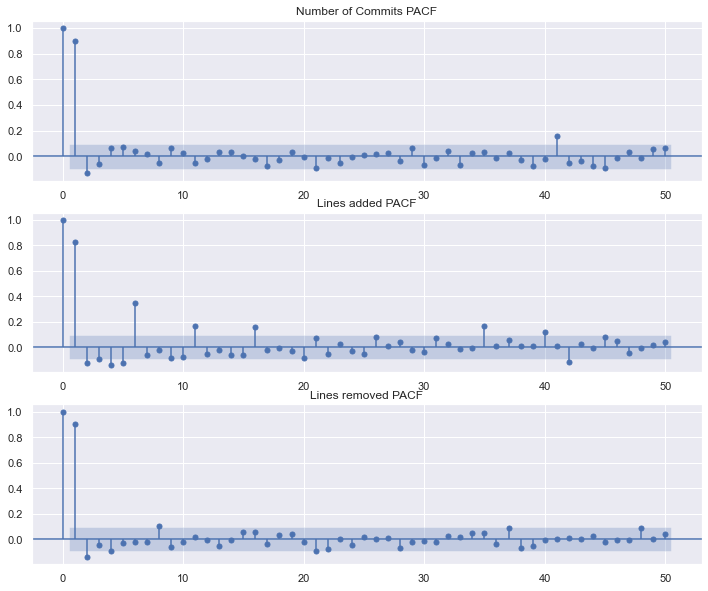

In [13]:
fig, ax = plt.subplots(3)
plot_pacf(grouped_df_short['commits_7d'].values.squeeze(), lags=50, title = "Number of Commits PACF", ax=ax[0])
plot_pacf(grouped_df_short['changes_7d_lines_added'].values.squeeze(), lags=50, title = "Lines added PACF", ax=ax[1])
plot_pacf(grouped_df_short['changes_7d_lines_removed'].values.squeeze(), lags=50, title = "Lines removed PACF", ax=ax[2])
plt.show()
# plt.savefig("ACF_plots.png")

PACF notes:
- The first **2** lags have a direct impact on the number of commits.
- For the lines added we observe some "strange" behavior:
    - The first **2** lags are important and then there is pattern that after every **4** lags, the lag is significant again. This is repeated until the 20 lag and then again at lag 35 and 40.
    - If we look closely at the timeseries maybe this behavior can be verified.
- For the lines removed only the first **2** lags are important.

#### Decomposition

- Additive or Multiplicative decomposition? (Depends on the time series, probably would be different)

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

We can say that Trend and Seasonality (if there are any) are constant over time, so we will start with Additive.

STL

In [15]:
stl = STL(grouped_df_short['commits_7d'], period = 52)
result_stl = stl.fit()
seasonal, trend, resid = result_stl.seasonal, result_stl.trend, result_stl.resid

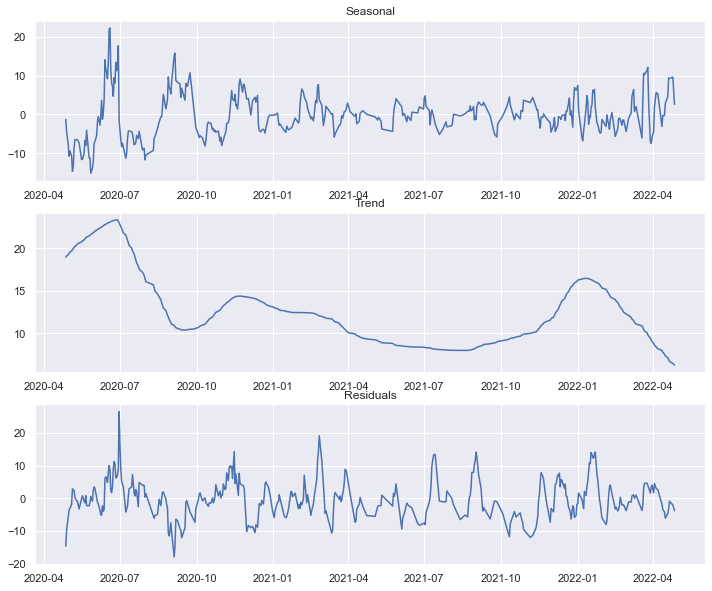

In [16]:
plt.subplot(3,1,1)
plt.plot(seasonal)
plt.title('Seasonal')

plt.subplot(3,1,2)
plt.plot(trend)
plt.title('Trend')

plt.subplot(3,1,3)
plt.plot(resid)
plt.title('Residuals')

plt.show()

Classical

In [17]:
result=seasonal_decompose(grouped_df_short['commits_7d'], model='additive', period = 52)
seasonal_c, trend_c, resid_c = result.seasonal, result.trend, result.resid

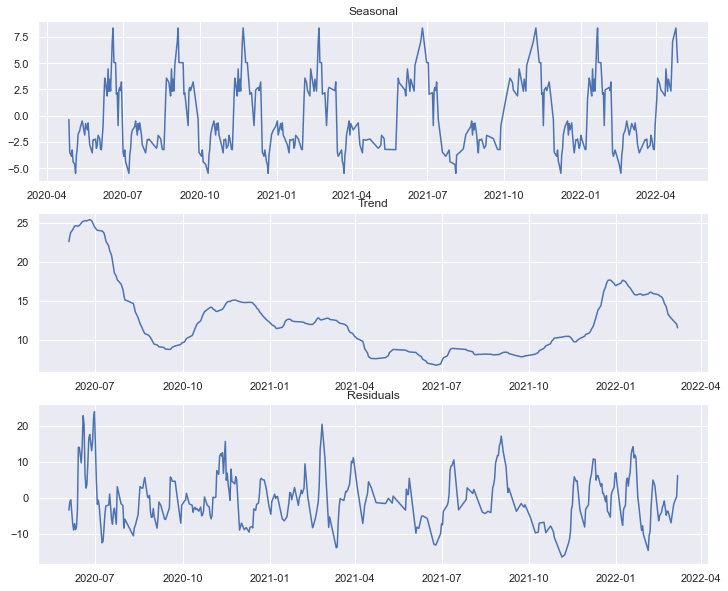

In [18]:
plt.subplot(3,1,1)
plt.plot(seasonal_c)
plt.title('Seasonal')

plt.subplot(3,1,2)
plt.plot(trend_c)
plt.title('Trend')

plt.subplot(3,1,3)
plt.plot(resid_c)
plt.title('Residuals')

plt.show()

Decomposition notes:


The decomposition doesn't seem to provide any information, since the data do not present any seasonal or trend-cycle component. So, both the seasonality and the trend diagram do not provide any information. The residuals look a lot like the original timeseries so, this is a confirmation on that the time series cannot be explained through seasonal or trend patterns.

#### Stationarity

In [22]:
test_stationarity(grouped_df_short, 'commits_7d')
test_stationarity(grouped_df_short, 'changes_7d_lines_added')
test_stationarity(grouped_df_short, 'changes_7d_lines_removed')

commits_7d : Stationary
changes_7d_lines_added : Stationary
changes_7d_lines_removed : Stationary


#### Random Walk

Generally the time series do not seem to be random. We can exclude white noise and possibly random walk, however for completness I created this function that tests for random walk.
The number of commits timeseries seems the more random of the three. Both from the plot and the ACF plot we can tell that it is **not** white noise. I am going to do a test for random walk to find out.

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def check_random_walk(data):
    results = adfuller(data)

    print(f"ADF Statistic: {results[0]}")
    print(f"p-value: {results[1]}")
    print("Critical Values:")
    for key, value in results[4].items():
        print("\t%s: %.3f" % (key, value))
    if results[1] <= 0.05:
        print("Reject null hypotheses --> Not Random Walk")
    else:
        print("Fail to Reject null hypotheses --> Random Walk")
    #The null hypotheses is that the series IS a random walk.

In [25]:
check_random_walk(grouped_df_short['commits_7d'])

ADF Statistic: -5.286234844478472
p-value: 5.846840738551954e-06
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571
Reject null hypotheses --> Not Random Walk


#### Explore the relations between the columns

Correlations

In [28]:
print_correlation(grouped_df_short['commits_7d'],grouped_df_short['changes_7d_lines_added'])
print_correlation(grouped_df_short['commits_7d'],grouped_df_short['changes_7d_lines_removed'])
print("-------------------------")
print_correlation(grouped_df_short['changes_7d_lines_added'],grouped_df_short['changes_7d_lines_removed'])

Correlation of commits_7d - changes_7d_lines_added: 0.3876674058390886
Correlation of commits_7d - changes_7d_lines_removed: 0.6817316328148306
-------------------------
Correlation of changes_7d_lines_added - changes_7d_lines_removed: 0.4337224286895583


Visualisation of the relations

In [29]:
plot_df = grouped_df_short
plot_df = plot_df.rename(columns={'commits_7d':"Commits",'changes_7d_lines_added':"Lines added",'changes_7d_lines_removed':"Lines removed"})

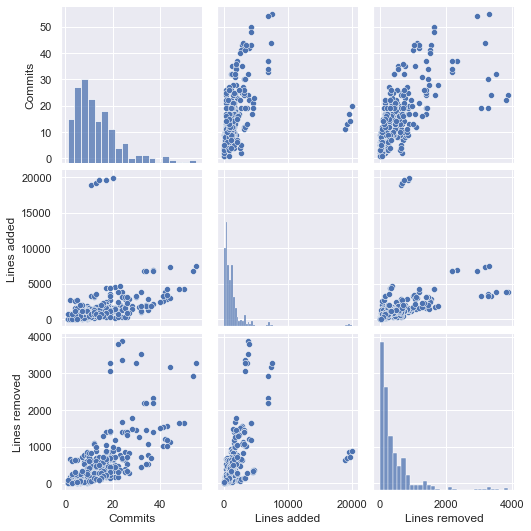

In [30]:
sns.pairplot(plot_df[["Commits","Lines added","Lines removed"]])
#plt.savefig("pairplots.png")

Inspect the distributions of the features

In [131]:
get_best_distribution(grouped_df_short['commits_7d'])
get_best_distribution(grouped_df_short['changes_7d_lines_added'])
get_best_distribution(grouped_df_short['changes_7d_lines_removed'])

commits_7d
Best fitting distribution: ncf
Best p value: 0.4280400844753195
Parameters for the best fit: (4.5319898401979, 33.68792960792193, 0.5053408558255227, -0.05453728020317511, 11.323631734426753)
changes_7d_lines_added
Best fitting distribution: f
Best p value: 0.40311272764723427
Parameters for the best fit: (3.3081543521439736, 5.466648339512831, -12.893165741020365, 857.1271892802135)
changes_7d_lines_removed
Best fitting distribution: gengamma
Best p value: 0.9639505430651727
Parameters for the best fit: (5.2239648877100056, 0.3501959707001465, -2.368835307771324, 2.584124242322658)


Curve fitting (polynomial)

Polynomial parameters: [ 8.21389045e-02 -5.77446735e+00  1.96796972e+02 -2.89434851e+02]


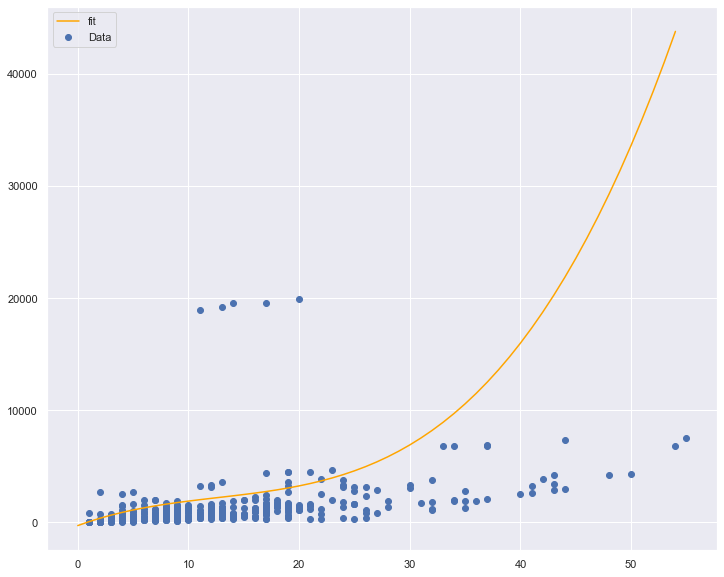

In [20]:
poly = poly_params(grouped_df_short['commits_7d'], grouped_df_short['changes_7d_lines_added'], 3)
fig, ax = plt.subplots()
ax.scatter(grouped_df_short['commits_7d'],grouped_df_short['changes_7d_lines_added'], label = "Data")
ax.plot(np.polyval(poly,np.linspace(0,100,int(grouped_df_short['commits_7d'].max()))),color="orange", label = "fit")
ax.legend()
# plt.savefig("com_add_poly.png")

Polynomial parameters: [-7.96711533e-03  8.19889264e-01  2.26065810e+01 -1.56709618e+01]


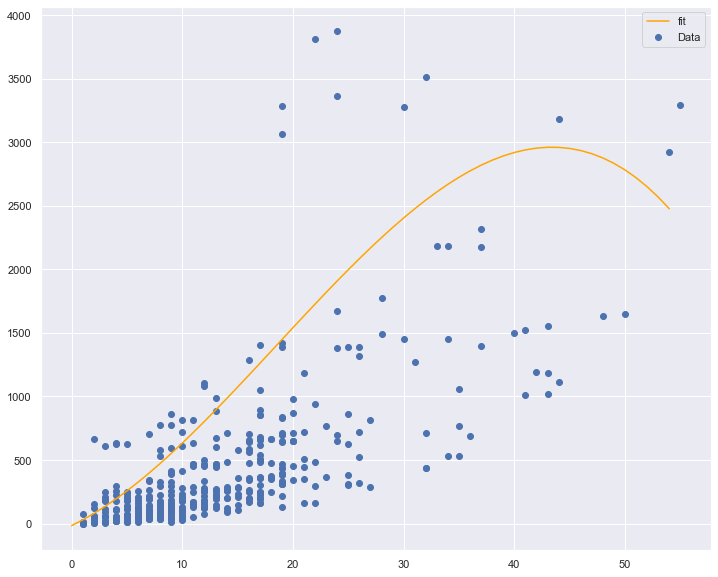

In [21]:
poly = poly_params(grouped_df_short['commits_7d'], grouped_df_short['changes_7d_lines_removed'], 3)
fig, ax = plt.subplots()
ax.scatter(grouped_df_short['commits_7d'],grouped_df_short['changes_7d_lines_removed'], label = "Data")
ax.plot(np.polyval(poly,np.linspace(0,100,int(grouped_df_short['commits_7d'].max()))),color="orange", label = "fit")
ax.legend()
# plt.savefig("com_rem_poly.png")

### Dive into Anomalies

Since the global anomalies have been identified, we need to dive more into them and try to determine what causes them.
Here I create two functions that do the following:

Function find_abnormal_cryptos:
- Input:
    - The feature of interest (out of the three features: Volume of commits, LOC added, LOC removed)
    - The anomaly date
    
- The **total** (aggregated) value for **this date** of each cryptocurrency is compared to the range:
    - (**total**_mean_of_cryptocurrency - 2,5 * **total**_std_of_cryptocurrency, 
        **total**_mean_of_cryptocurrency + 2,5 * **total**_std_of_cryptocurrency)
        
- The cryprocurrencies that are out of this range are the ones to focus for the anomaly

- Output:
    - Dictionary : {date: list of cryptos}

In [479]:
def find_abnormal_cryptos(column,date):
    cryptos_dict = {}
    anomaly_cryptos = []
    # Slice the dataframe to get only for the anomaly date 
    anomaly_data = crypto_weekly[crypto_weekly['date'] == date]
    # For each crypto
    for crypto in anomaly_data['cryptocurrency_name'].unique():
        # This is the total (aggregated) value for that date and one crypto
        current_value = anomaly_data.groupby('cryptocurrency_name').sum()[column].loc[crypto]
        # These are the aggregated mean and std for that cryptocurrency throughout all dates 
        crypto_mean = crypto_weekly.groupby(['date', 'cryptocurrency_name']).sum().loc[:,crypto,:].mean()[column]
        crypto_std = crypto_weekly.groupby(['date', 'cryptocurrency_name']).sum().loc[:,crypto,:].std()[column]
        # Compare with the range (the range can of course be calculated with another way)
        if ((current_value > crypto_mean + 2.5*crypto_std) | (current_value < crypto_mean - 2.5*crypto_std)):
            anomaly_cryptos.append(crypto)
    cryptos_dict[date] = anomaly_cryptos
    print("--------------------------")
    print("Date:", date)
    print("Feature:", column)
    print("--------------------------")
    for crypto in anomaly_cryptos:
        print("Name of cryprocurrency:", crypto)
        print("Value:", anomaly_data.groupby('cryptocurrency_name').sum()[column].loc[crypto])
        print("Cryptocurrency mean:", crypto_weekly.groupby(['date', 'cryptocurrency_name']).sum().loc[:,crypto,:].mean()[column])
        print("Cryptocurrency std:", crypto_weekly.groupby(['date', 'cryptocurrency_name']).sum().loc[:,crypto,:].std()[column])
    
    
    return cryptos_dict


In [490]:
dict_20180316 = find_abnormal_cryptos('commits_7d','2018-03-16')

--------------------------
Date: 2018-03-16
Feature: commits_7d
--------------------------
Name of cryprocurrency: Centra
Value: 16.0
Cryptocurrency mean: 0.5435435435435435
Cryptocurrency std: 2.6278275755695004
Name of cryprocurrency: Divi
Value: 29.0
Cryptocurrency mean: 6.186186186186186
Cryptocurrency std: 7.712932430410228
Name of cryprocurrency: Humaniq
Value: 57.0
Cryptocurrency mean: 7.969879518072289
Cryptocurrency std: 17.988221960232053
Name of cryprocurrency: Nuls
Value: 239.0
Cryptocurrency mean: 64.46084337349397
Cryptocurrency std: 56.9288656403166
Name of cryprocurrency: Omni
Value: 259.0
Cryptocurrency mean: 15.400602409638553
Cryptocurrency std: 31.340721841678416


In [491]:
dict_20180316

{'2018-03-16': ['Centra', 'Divi', 'Humaniq', 'Nuls', 'Omni']}

This is the result of the first function that gives us the Cryptos that behaved abnoramlly that day.

Next, we move forward to the specific repos that behaved abnormally.

Function find_abnormal_repos:

- Input:
    - The output dictionary that the previous function created {date: list of cryptos}
    - Feature of interest (should be the same as before)

- The value of each repo for **that day** is compared to a range (similar as before):
    - (**total**_mean_of_repo - 2,5 * **total**_std_of _repo, **total**_mean_of_repo + 2,5 * **total**_std_of _repo)

- The repos that are of that range are the ones causing the anomaly

- Output:
    - Dictionary: {date,crypto: list_of_repositories} 

In [501]:
def find_abnormal_repos(cryptos_dict,column):
    final_dict = {}
    for key,cryptos in cryptos_dict.items():
        date = key
        cryptos_list = cryptos
    for crypto in cryptos_list:
        anomaly_repos = []
        crypto_repos = crypto_weekly[(crypto_weekly['date'] == date)&(crypto_weekly['cryptocurrency_name'] == crypto)]
        for repo in crypto_repos['repo_name'].unique():
            current_value = crypto_repos[crypto_repos['repo_name']==repo][column].item()
            repo_mean = crypto_weekly[crypto_weekly['cryptocurrency_name'] == crypto].groupby('repo_name').mean()[column].loc[repo]
            repo_std = crypto_weekly[crypto_weekly['cryptocurrency_name'] == crypto].groupby('repo_name').std()[column].loc[repo]
            if ((current_value > repo_mean + 2.5*repo_std) | (current_value < repo_mean - 2.5*repo_std)):
                anomaly_repos.append(repo)
        final_dict[(date,crypto)] = anomaly_repos
        print("--------------------------")
        print("Date:", date, "|", "Crypto:", crypto )
        print("Feature:", column)
        print("--------------------------")
        for repo in anomaly_repos:
            print("Name of repository:", repo)
            print("Value:", crypto_repos[crypto_repos['repo_name']==repo][column].item())
            print("Repo mean:", crypto_weekly[crypto_weekly['cryptocurrency_name'] == crypto].groupby('repo_name').mean()[column].loc[repo])
            print("Repo std:", crypto_weekly[crypto_weekly['cryptocurrency_name'] == crypto].groupby('repo_name').std()[column].loc[repo])
    
    return final_dict



In [502]:
find_abnormal_repos(dict_20180316,'commits_7d')

--------------------------
Date: 2018-03-16 | Crypto: Centra
Feature: commits_7d
--------------------------
Name of repository: Blockchain-Protocol
Value: 1.0
Repo mean: 0.02456140350877193
Repo std: 0.15505644332868448
Name of repository: centra
Value: 4.0
Repo mean: 0.08408408408408409
Repo std: 0.574680753820924
Name of repository: CTK-PHP
Value: 2.0
Repo mean: 0.175
Repo std: 0.5686982693124603
Name of repository: Currency-Conversion-Engine
Value: 1.0
Repo mean: 0.02456140350877193
Repo std: 0.15505644332868448
Name of repository: Open-Wallet
Value: 1.0
Repo mean: 0.02456140350877193
Repo std: 0.15505644332868448
Name of repository: smart-contract
Value: 7.0
Repo mean: 0.14714714714714713
Repo std: 1.0056913191866177
--------------------------
Date: 2018-03-16 | Crypto: Divi
Feature: commits_7d
--------------------------
Name of repository: node-divi
Value: 16.0
Repo mean: 0.3916083916083916
Repo std: 2.476655824022825
--------------------------
Date: 2018-03-16 | Crypto: Humaniq
F

{('2018-03-16', 'Centra'): ['Blockchain-Protocol',
  'centra',
  'CTK-PHP',
  'Currency-Conversion-Engine',
  'Open-Wallet',
  'smart-contract'],
 ('2018-03-16', 'Divi'): ['node-divi'],
 ('2018-03-16', 'Humaniq'): [],
 ('2018-03-16', 'Nuls'): ['nuls'],
 ('2018-03-16', 'Omni'): ['omniapi', 'omniEngine', 'omniexplorer']}

This is an approach to drill down from the **global - aggregated** anomaly to the specific cryptocurrencies/ projects and the repositories that behave anbnormally. 


Notes to that approach:

- Attributes of the data should be checked (like Stationarity, Ergodicity, Central Limit Theorem for the repositories of a cryptocurrency/ project).


- The way the "abnormal" cryptos and repos are identified could be changed (different range calculation, calculate the mean and std only with the previous values).


- With this approach, potential roots of the anomaly can be identified and maybe provide some explanation and interpretation of the anomaly.